In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
mnist = fetch_openml('mnist_784') # already flatten

In [3]:
sample = np.random.randint(70000, size=10000)
data = mnist.data[sample] 
target = mnist.target[sample]
print(target.shape)
data_df = pd.DataFrame(data)
data_df

(10000,)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0


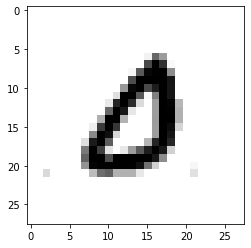

In [4]:
image = data_df.values[2].reshape((-1, 28, 28))
plt.imshow(image[0],cmap=plt.cm.gray_r,interpolation="nearest")
print(target[2])

In [5]:
std_data = StandardScaler().fit_transform(data_df.values)
print(std_data.shape)

(10000, 784)


In [6]:
# In order to not lose the original index we build a df
std_data_df = pd.DataFrame(std_data, index=data_df.index)

0


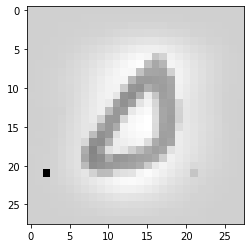

In [7]:
image_std = std_data_df.values[2].reshape((-1, 28, 28))
plt.imshow(image_std[0],cmap=plt.cm.gray_r,interpolation="nearest")
print(target[2])

In [8]:
tsne = TSNE(n_components=2, random_state=42)

In [9]:
tsne_data = tsne.fit_transform(std_data_df.values)
print(tsne_data)
tsne_DF = pd.DataFrame(data = tsne_data, columns = ['Dim 1', 'Dim 2'])

[[ 31.444853 -49.356598]
 [ 44.501144 -38.554043]
 [-38.94135   31.94813 ]
 ...
 [ -2.839843  19.855417]
 [-62.07203  -38.88017 ]
 [-10.450575  23.903225]]


In [10]:
tsne_DF_label = pd.concat([tsne_DF, pd.DataFrame(target, columns = ['true_label'])], axis = 1)
tsne_DF_label

,Dim 1,Dim 2,true_label
0,31.444853,-49.356598,7
1,44.501144,-38.554043,9
2,-38.941349,31.948130,0
3,19.341972,-26.137440,4
4,62.439034,-25.384893,9
...,...,...,...
9995,42.762959,-39.496391,9
9996,-69.789284,7.324035,1
9997,-2.839843,19.855417,3
9998,-62.072029,-38.880169,1


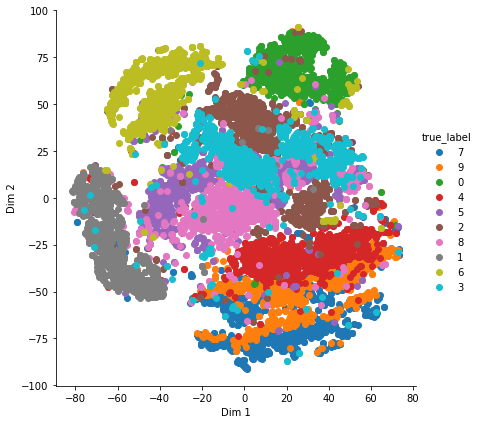

In [11]:
sns.FacetGrid(tsne_DF_label, hue="true_label", height=6).map(plt.scatter, 'Dim 1', 'Dim 2').add_legend()
plt.show()

In [21]:
# Let's see if we use a MinMaxScaler:
norm_data = MinMaxScaler().fit_transform(data_df.values)
print(norm_data.shape)

(10000, 784)


In [22]:
# In order to not lose the original index we build a df
norm_data_df = pd.DataFrame(norm_data, index=data_df.index)

0


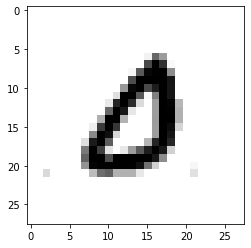

In [23]:
image_std = norm_data_df.values[2].reshape((-1, 28, 28))
plt.imshow(image_std[0],cmap=plt.cm.gray_r,interpolation="nearest")
print(target[2])

In [24]:
tsne_data_norm = tsne.fit_transform(norm_data_df.values)
print(tsne_data_norm)
tsne_DF_norm = pd.DataFrame(data = tsne_data_norm, columns = ['Dim 1', 'Dim 2'])

[[  4.8641706 -25.83642  ]
 [ 30.453327  -50.07252  ]
 [-34.348274   42.649063 ]
 ...
 [  6.5991654  12.086652 ]
 [-74.23904     4.853384 ]
 [ 21.935856    1.9164165]]


In [25]:
tsne_DF_norm_label = pd.concat([tsne_DF_norm, pd.DataFrame(target, columns = ['true_label'])], axis = 1)
tsne_DF_norm_label

,Dim 1,Dim 2,true_label
0,4.864171,-25.836420,7
1,30.453327,-50.072521,9
2,-34.348274,42.649063,0
3,48.125374,-62.779129,4
4,60.145428,-36.676727,9
...,...,...,...
9995,26.855005,-51.438984,9
9996,-57.374805,-34.560600,1
9997,6.599165,12.086652,3
9998,-74.239037,4.853384,1


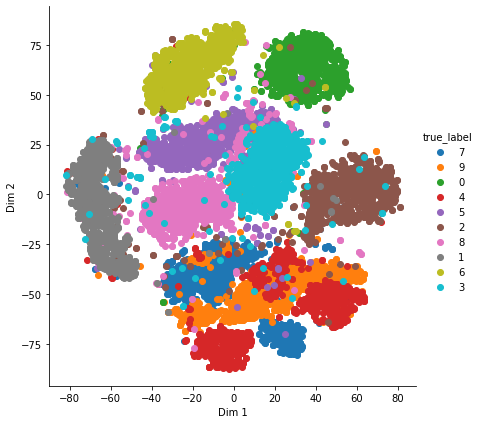

In [26]:
sns.FacetGrid(tsne_DF_norm_label, hue="true_label", height=6).map(plt.scatter, 'Dim 1', 'Dim 2').add_legend()
plt.show()

In [27]:
# LEt's try a 3D decomposition (on MinMax)
tsne3 = TSNE(n_components=3, random_state=42)

In [28]:
tsne_data3 = tsne3.fit_transform(norm_data_df.values)
print(tsne_data3)
tsne_DF_norm3 = pd.DataFrame(data = tsne_data3, columns = ['Dim 1', 'Dim 2', 'Dim 3'])

[[  1.9365001   -2.17976     14.177956  ]
 [-19.09182     -2.6671517    7.302691  ]
 [ 13.713127    -0.29429948  -6.3282356 ]
 ...
 [  6.0904045   -8.470677   -23.615768  ]
 [ 12.791771   -20.490608     0.29409283]
 [ 10.174706    -4.179229   -19.581968  ]]


In [29]:
tsne_DF_norm3_label = pd.concat([tsne_DF_norm3, pd.DataFrame(target, columns = ['true_label'])], axis = 1)
tsne_DF_norm3_label

,Dim 1,Dim 2,Dim 3,true_label
0,1.936500,-2.179760,14.177956,7
1,-19.091820,-2.667152,7.302691,9
2,13.713127,-0.294299,-6.328236,0
3,-17.402802,10.037142,12.515221,4
4,-19.583200,14.627680,0.389056,9
...,...,...,...,...
9995,-12.982239,13.381431,3.258774,9
9996,19.161430,-5.905137,11.533640,1
9997,6.090405,-8.470677,-23.615768,3
9998,12.791771,-20.490608,0.294093,1


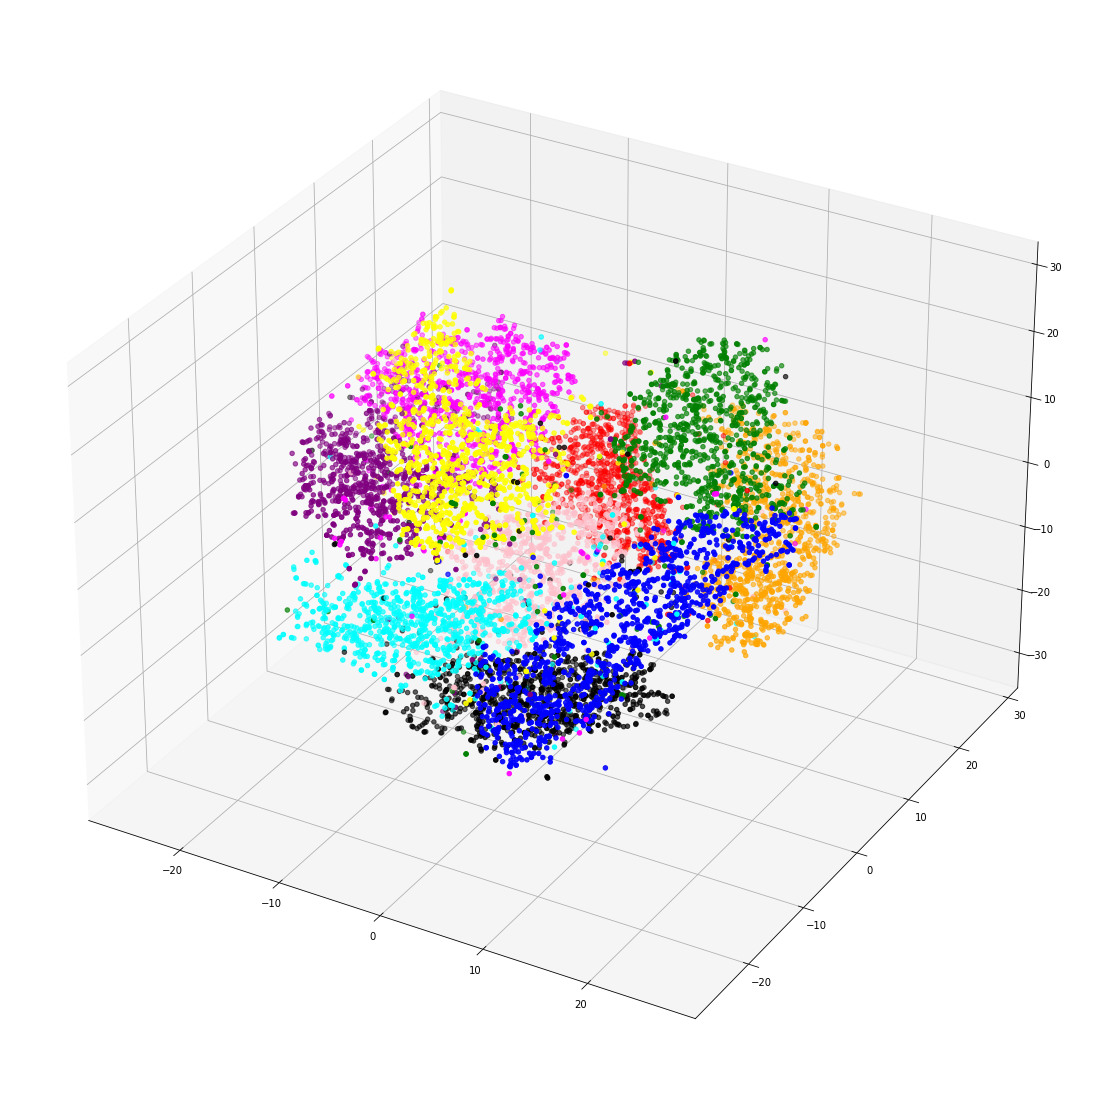

In [30]:
fig = plt.figure(figsize=(15,15))
#ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
x = tsne_DF_norm3_label['Dim 1']
y = tsne_DF_norm3_label['Dim 2']
z = tsne_DF_norm3_label['Dim 3']
colors = {
    '0':'red', 
    '1':'blue', 
    '2':'green', 
    '3':'black',
    '4':'magenta',
    '5':'pink',
    '6':'orange',
    '7':'yellow',
    '8':'cyan',
    '9':'purple'
}

ax.scatter(x, y, z, c=tsne_DF_norm3_label['true_label'].apply(lambda x: colors[x]))

plt.show()